In [19]:
#Plot Jaz current vs time for the recent 800 nm expts. I downloaded several lvm files for this.
#Original data in LabView lvm files looks like a tab delimited text file

SenseResistance=100 #Sense resistor value in ohms. 
#This resistor is in series between the ICEO cell and ground. 
#The voltage that develops across it is proportional to the current through the ICEO cell.

#now bring in the data and create variables for plots
import numpy as np
ICEOData100= np.loadtxt('800nm/100Hz1.lvm', delimiter='\t') 
Timebase100=ICEOData100[:,0]#Going ahead and assuming timebase in seconds. 
PressureData100=ICEOData100[:,1] #Assuming the rest of data is in volts
CurrentData100=[CurrentDatum/SenseResistance for CurrentDatum in ICEOData100[:,2]] #Puts current into units of amperes
VoltageData100=[50*2*VoltageDatum for VoltageDatum in ICEOData100[:,3]]#Assumes 2x voltage divider, and 50x trek gain, and ignores voltage drop across sense resistor

ICEOData200= np.loadtxt('800nm/200Hz1.lvm', delimiter='\t') 
Timebase200=ICEOData200[:,0]#Going ahead and assuming timebase in seconds. 
PressureData200=ICEOData200[:,1] #Assuming the rest of data is in volts
CurrentData200=[CurrentDatum/SenseResistance for CurrentDatum in ICEOData200[:,2]] #Puts current into units of amperes
VoltageData200=[50*2*VoltageDatum for VoltageDatum in ICEOData200[:,3]]#Assumes 2x voltage divider, and 50x trek gain, and ignores voltage drop across sense resistor

ICEOData300= np.loadtxt('800nm/300Hz1.lvm', delimiter='\t') 
Timebase300=ICEOData300[:,0]#Going ahead and assuming timebase in seconds. 
PressureData300=ICEOData300[:,1] #Assuming the rest of data is in volts
CurrentData300=[CurrentDatum/SenseResistance for CurrentDatum in ICEOData300[:,2]] #Puts current into units of amperes
VoltageData300=[50*2*VoltageDatum for VoltageDatum in ICEOData300[:,3]]#Assumes 2x voltage divider, and 50x trek gain, and ignores voltage drop across sense resistor


In [20]:
Timebase100[0:10],PressureData100[0:10],CurrentData100[0:10],VoltageData100[0:10] #check out what this data looks like
len(Timebase300)

662000

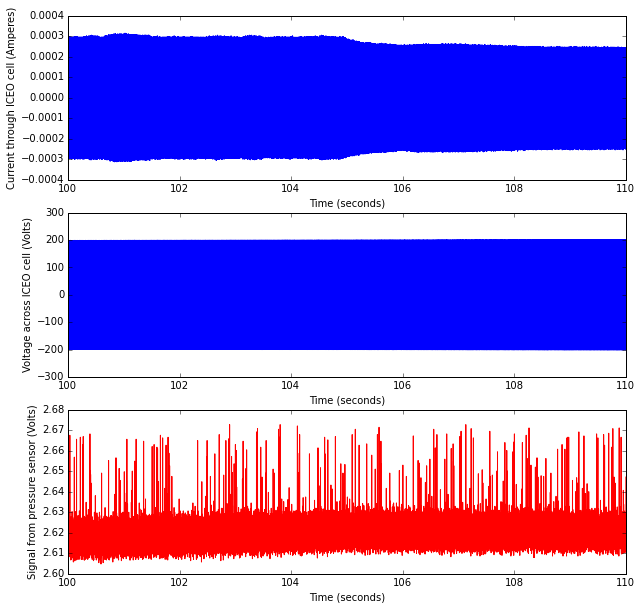

In [10]:
#plot all the data
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(Timebase100[100000:110000],CurrentData100[100000:110000])
plt.hold('True')

plt.xlabel('Time (seconds)')
plt.ylabel('Current through ICEO cell (Amperes)')

plt.subplot(3,1,2)
plt.plot(Timebase100[100000:110000],VoltageData100[100000:110000])#voltage data should go in a different subplot
#with a different y axis label
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage across ICEO cell (Volts)')

plt.subplot(3,1,3)
plt.plot(Timebase100[100000:110000],PressureData100[100000:110000],'r-')#pressure data should go in a different subplot
#with a different y axis label
plt.xlabel('Time (seconds)')
plt.ylabel('Signal from pressure sensor (Volts)')

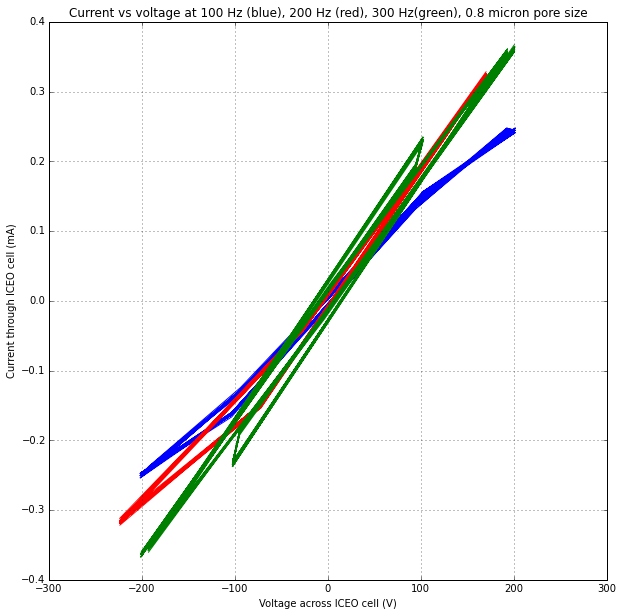

In [23]:
#how about a IV plot using a few cycles
plt.figure (figsize=(10,10))
plt.plot(np.array(VoltageData100[110000:110200]),1000*np.array(CurrentData100[110000:110200]))#plotting in milliamps
plt.title('Current vs voltage at 100 Hz (blue), 200 Hz (red), 300 Hz(green), 0.8 micron pore size')
plt.xlabel('Voltage across ICEO cell (V)')
plt.ylabel('Current through ICEO cell (mA)')
plt.grid('on')
plt.hold('true')
plt.plot(np.array(VoltageData200[110000:110200]),1000*np.array(CurrentData200[110000:110200]),'r')#plotting in milliamps
plt.plot(np.array(VoltageData300[310000:310200]),1000*np.array(CurrentData300[310000:310200]),'g')#plotting in milliamps

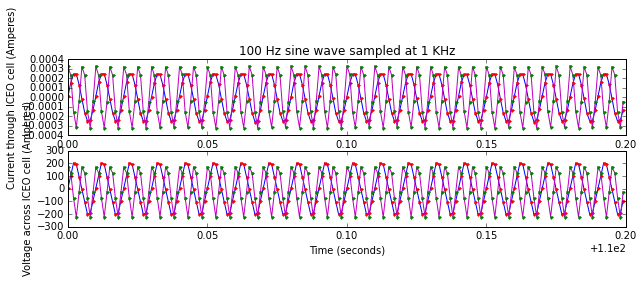

In [18]:
#plot just a short period of the current and voltage data to see the 100 Hz square wave
plt.figure(figsize=(10,3))
plt.subplot(2,1,1)
plt.plot(Timebase100[110000:110200],CurrentData100[110000:110200])
plt.hold('True')
plt.plot(Timebase100[110000:110200],CurrentData100[110000:110200],'r.')
plt.plot(Timebase200[110000:110200],CurrentData200[110000:110200],'m')
plt.plot(Timebase200[110000:110200],CurrentData200[110000:110200],'g.')
plt.xlabel('Time (seconds)')
plt.ylabel('Current through ICEO cell (Amperes)')
plt.title('100 Hz sine wave sampled at 1 KHz')

plt.subplot(2,1,2)
plt.plot(Timebase100[110000:110200],VoltageData100[110000:110200])
plt.hold('True')
plt.plot(Timebase100[110000:110200],VoltageData100[110000:110200],'r.')
plt.plot(Timebase200[110000:110200],VoltageData200[110000:110200],'m')
plt.plot(Timebase200[110000:110200],VoltageData200[110000:110200],'g.')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage across ICEO cell (Amperes)')


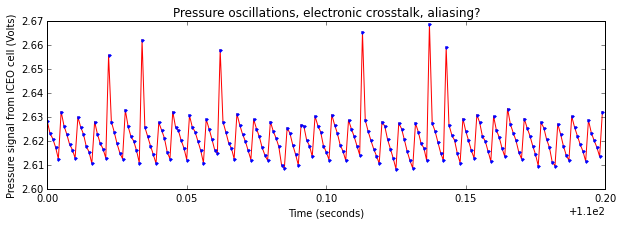

In [7]:
#what is the pressure doing during the same time???
plt.figure(figsize=(10,3))
plt.plot(Timebase100[110000:110200],PressureData100[110000:110200],'r')
plt.hold('True')
plt.plot(Timebase100[110000:110200],PressureData100[110000:110200],'b.')

plt.xlabel('Time (seconds)')
plt.ylabel('Pressure signal from ICEO cell (Volts)')
plt.title('Pressure oscillations, electronic crosstalk, aliasing?')


In [36]:
#The sense resistor is working well here at 250V pp. 
#Why is the current hitting a wall at about 1.25 mA? Is this a limit to the current the Trek can produce?
#Does this maximum change if you increase the frequency?
#The IV curve has an opening at 0,0. This could have come about because of capacitance. It should depend on the scan rae.

#We should use a triangle wave -- Done
#https://web.nmsu.edu/~snsm/classes/chem435/Lab13/intro.html


